# IMDB Movie EDA
![ImdbIcon](../images/imdbheader.jpg)

## Notebook Overview

Using both revenue and total score dataframes in my exploratory data analysis. In this notebook, I will discover, identify, and analyze outliers and common trends in both of my datasets. I will also seperate each genre to identify what genre scores the best, and what genre brings in the most revenue. Simialarly, I want to identify which role (actors, actresses, directors) that have the most significant impact on a movie's total score and revenue.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
revenue_df = pd.read_csv('../data/revenue_df.csv')
totalscore_df = pd.read_csv('../data/totalscore_df.csv')

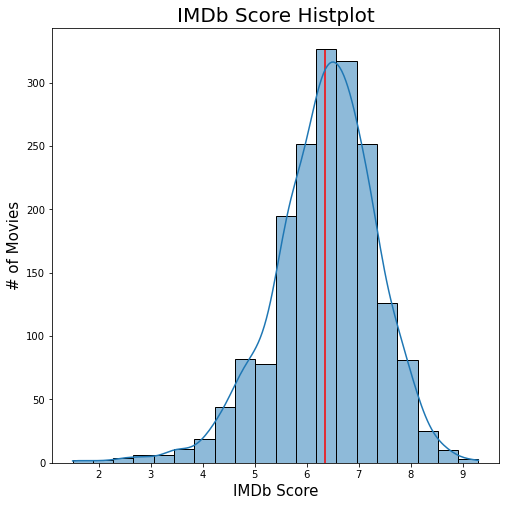

In [3]:
plt.figure(figsize = (8, 8))

sns.histplot(revenue_df['imdb_score'], kde=True, bins = 20);

plt.title("IMDb Score Histplot", size = 20)
plt.xlabel("IMDb Score", size = 15)
plt.ylabel("# of Movies", size = 15);

plt.vlines(x = np.mean(revenue_df['imdb_score']), ymin = 0, ymax = 326, color = 'r');

plt.savefig("../images/total_score_histplot.png")

C:\Users\nolan_fur2pfn\.conda\envs\tf\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


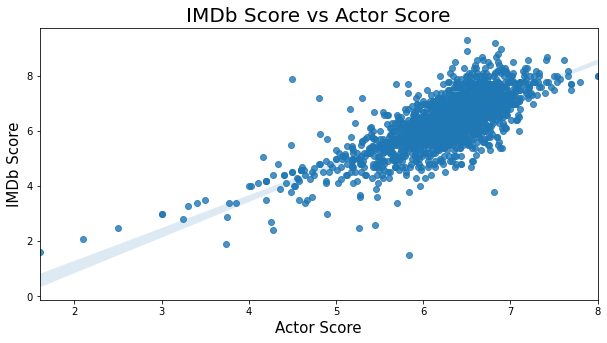

In [4]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="actor_score", y="imdb_score")

plt.title("IMDb Score vs Actor Score", size = 20)
plt.xlabel("Actor Score", size = 15)
plt.ylabel("IMDb Score", size = 15);

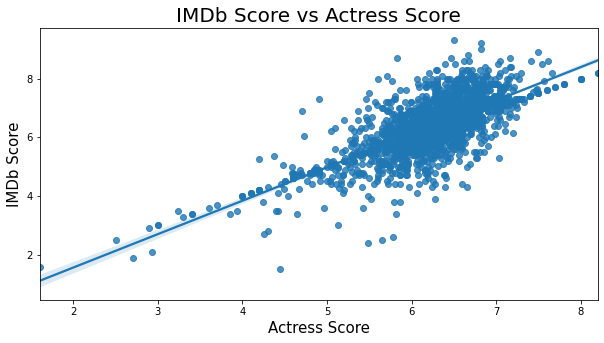

In [5]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="actress_score", y="imdb_score")

plt.title("IMDb Score vs Actress Score", size = 20)
plt.xlabel("Actress Score", size = 15)
plt.ylabel("IMDb Score", size = 15);

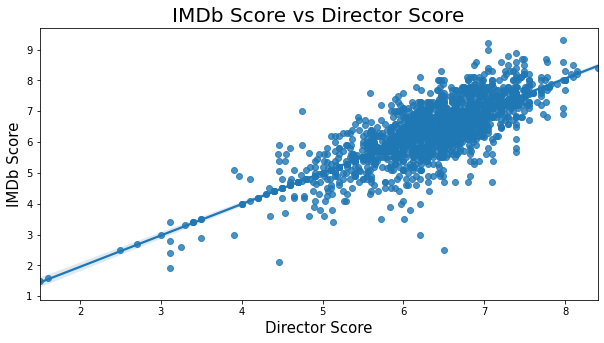

In [6]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="director_score", y="imdb_score")

plt.title("IMDb Score vs Director Score", size = 20)
plt.xlabel("Director Score", size = 15)
plt.ylabel("IMDb Score", size = 15);

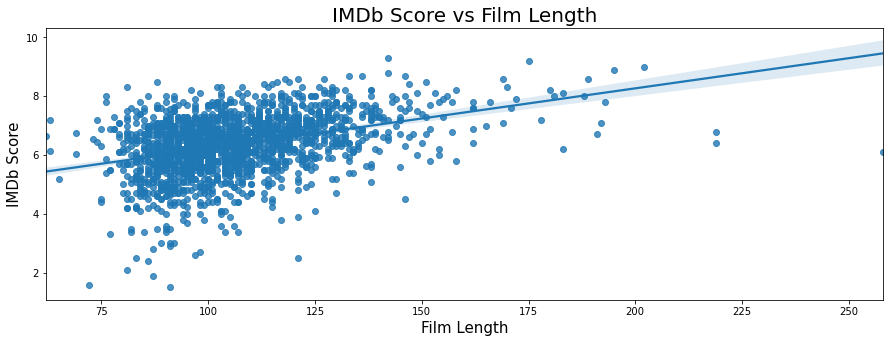

In [7]:
plt.figure(figsize= (15, 5));

sns.regplot(data = revenue_df, x="duration", y="imdb_score")

plt.title("IMDb Score vs Film Length", size = 20)
plt.xlabel("Film Length", size = 15)
plt.ylabel("IMDb Score", size = 15)

plt.xticks();

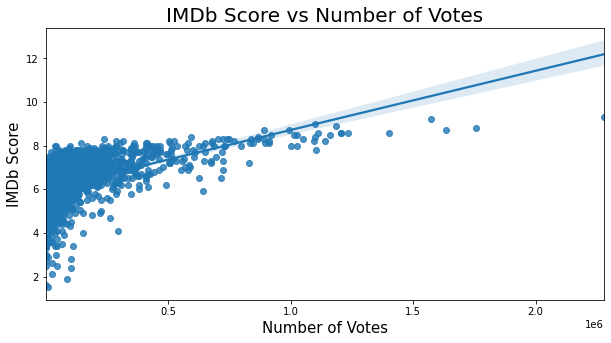

In [8]:
plt.figure(figsize= (10, 5));

sns.regplot(data = revenue_df, x="total_votes", y="imdb_score")

plt.title("IMDb Score vs Number of Votes", size = 20)
plt.xlabel("Number of Votes", size = 15)
plt.ylabel("IMDb Score", size = 15)

plt.xticks();

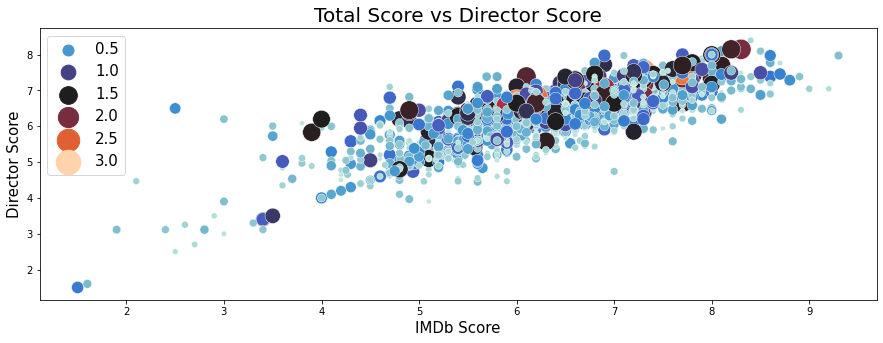

In [9]:
plt.figure(figsize= (15, 5));

sns.scatterplot(data = revenue_df, x="imdb_score", y="director_score", 
                hue = 'budget', size = 'budget', sizes = (25, 600), 
                palette = 'icefire') # icefire / ocean

plt.legend(loc = 'best', fontsize = 15)
plt.title("Total Score vs Director Score", size = 20)
plt.xlabel("IMDb Score", size = 15)
plt.ylabel("Director Score", size = 15);

plt.savefig("../images/directortotalscore_budget.png")

In [10]:
revenue_df[(revenue_df['imdb_score'] < 3.5) & (revenue_df['director_score'] < 4)].sort_values(by = ['budget'], ascending=False)[0:1]

,movie_title,year,tagline,plot,cast,duration,Action,Adventure,Animation,Biography,...,actor_score,actress_score,tagline_sentiment,plot_sentiment,imdb_score,profitable,budget,revenue,budget_adj,revenue_adj
262,Catwoman,2004,CATch Her In IMAX,"A shy woman, endowed with the speed, reflexes,...","Halle Berry, Benjamin Bratt, Sharon Stone, Lam...",104,1.0,0.0,0.0,0.0,...,5.695,5.820089,0.0,0.3182,3.4,0,100000000,82102379,115444540,94782713


In [11]:
revenue_df['rounded_score_one'] = revenue_df['imdb_score'].round(1)
revenue_df['rounded_score_whole'] = revenue_df['imdb_score'].round()

C:\Users\nolan_fur2pfn\.conda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


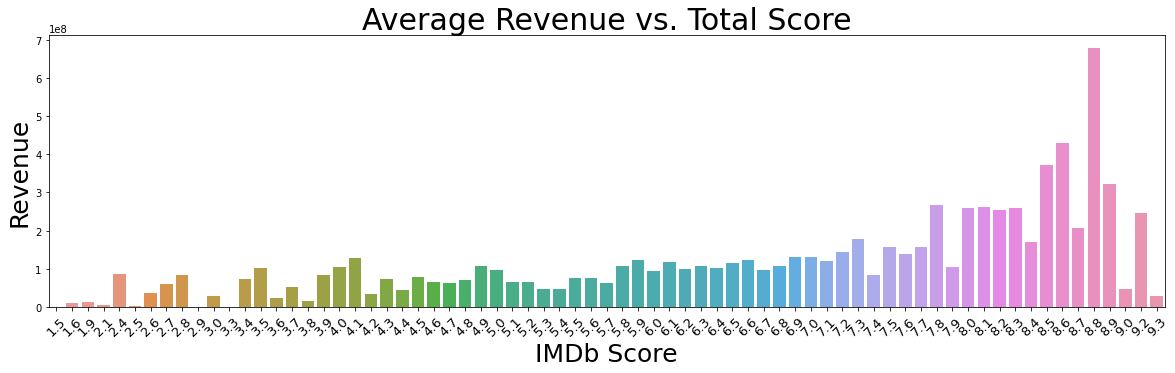

In [12]:
plt.figure(figsize = (20, 5))

average_rev = revenue_df.groupby("rounded_score_one").revenue.mean()
sns.barplot(average_rev.index, average_rev.values)

plt.title("Average Revenue vs. Total Score", size = 30)
plt.xlabel("IMDb Score", size = 25)
plt.xticks(size = 13, rotation = 45)
plt.ylabel("Revenue", size = 25);

C:\Users\nolan_fur2pfn\.conda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


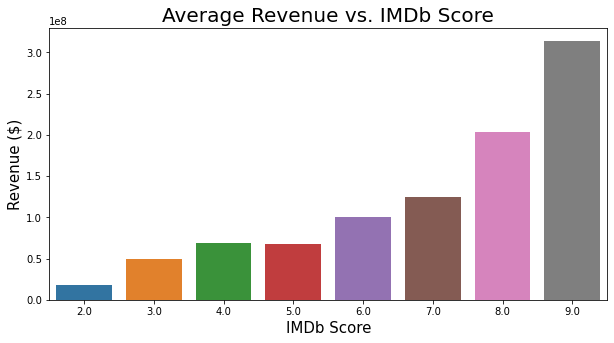

In [13]:
plt.figure(figsize = (10, 5))

average_rev = revenue_df.groupby("rounded_score_whole").revenue.mean()
sns.barplot(average_rev.index, average_rev.values)

plt.title("Average Revenue vs. IMDb Score", size = 20)
plt.xlabel("IMDb Score", size = 15)
plt.ylabel("Revenue ($)", size = 15);

plt.savefig("../images/revenue_totalscore.png")

In [22]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 
            'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 
            'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 
            'Sport', 'Thriller', 'War', 'Western']

for genre in genres:
    revenue_df.loc[revenue_df[genre] == 1, 'revenue'].mean()
    print(genre, revenue_df.loc[revenue_df[genre] == 1, 'revenue'].mean())

Action 177842213.789011
Adventure 275594873.3958333
Animation 309501465.23275864
Biography 74233082.26923077
Comedy 112345441.46551724
Crime 72143061.42818429
Drama 76352946.53098421
Family 141631217.981982
Fantasy 179497091.4074074
History 93373652.52380952
Horror 54552827.16990291
Music 65791107.847457625
Musical 46853752.615384616
Mystery 86574279.03267974
Romance 83377308.8624161
Sci-Fi 198186040.09876543
Sport 61961116.63829787
Thriller 85312198.24503312
War 77335635.15
Western 71317461.83333333


In [20]:
genres = ['Action', 'Adventure', 'Animation', 'Biography', 
            'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 
            'Music', 'Mystery', 'Romance', 'Sci-Fi', 
            'Sport', 'Thriller', 'War', 'Western']

for genre in genres:
    totalscore_df.loc[totalscore_df[genre] == 1, 'imdb_score'].mean()
    print(genre, totalscore_df.loc[totalscore_df[genre] == 1, 'imdb_score'].mean())

Action 6.126781609195404
Adventure 6.3095
Animation 6.639890710382513
Biography 6.9854922279792735
Comedy 6.059554140127389
Crime 6.301891252955082
Drama 6.513362276893392
Family 5.976859504132232
Fantasy 5.996938775510205
History 6.8442307692307685
Horror 5.542463533225283
Music 6.275555555555555
Mystery 6.135449735449735
Romance 6.212581913499345
Sci-Fi 5.924857142857142
Sport 6.364227642276423
Thriller 6.020863309352518
War 6.71875
Western 6.542500000000001


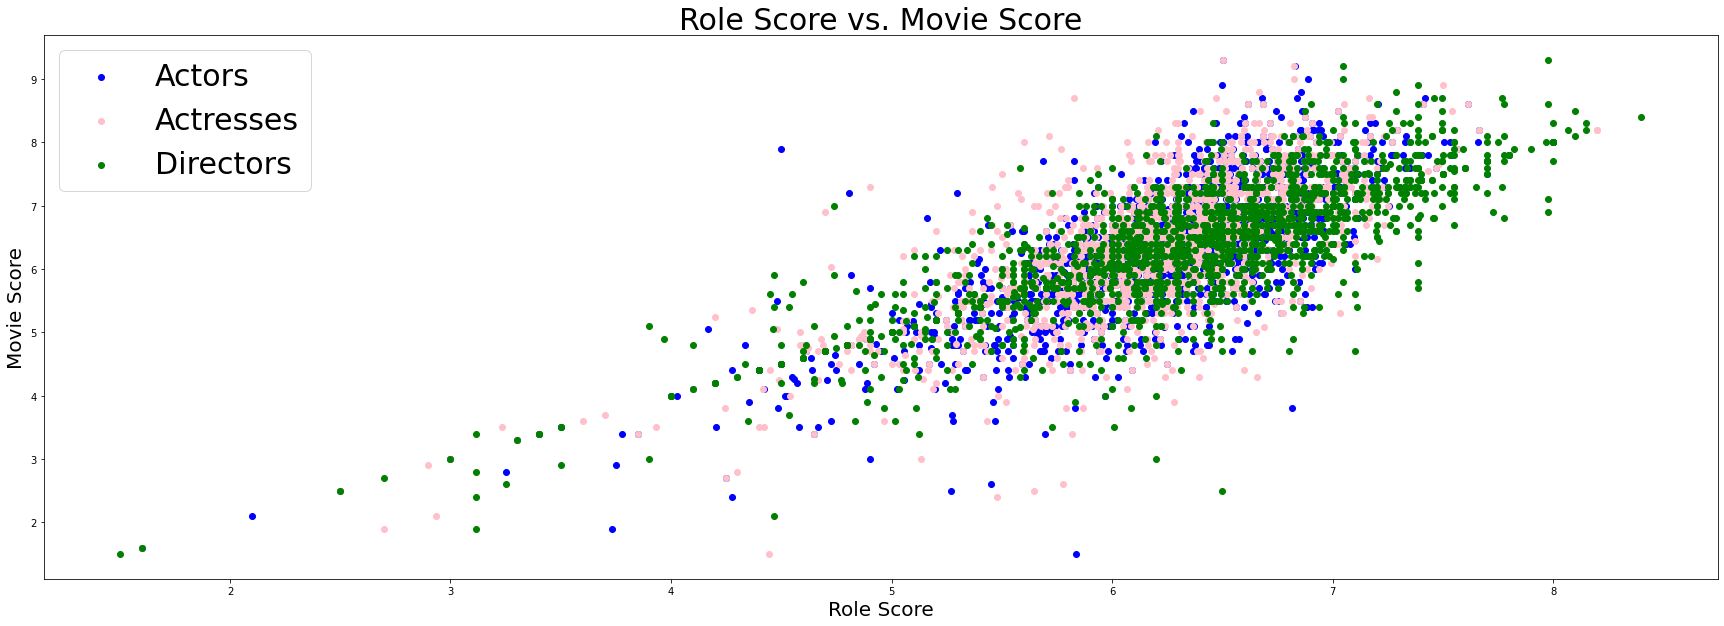

In [17]:
plt.figure(figsize=(30, 10))

plt.scatter(revenue_df['actor_score'],
            revenue_df['imdb_score'], color='blue', label = 'Actors'); 

plt.scatter(revenue_df['actress_score'],
            revenue_df['imdb_score'], color='pink', label = 'Actresses'); 

plt.scatter(revenue_df['director_score'],
            revenue_df['imdb_score'], color='green', label = 'Directors'); 

plt.title("Role Score vs. Movie Score", fontsize=30)
plt.ylabel("Movie Score", fontsize = 20)
plt.xlabel("Role Score", fontsize = 20);

plt.legend(fontsize = 30);

In [23]:
revenue_df.sort_values(by = 'imdb_score', ascending = False).head(3)

,movie_title,year,tagline,plot,cast,duration,Action,Adventure,Animation,Biography,...,tagline_sentiment,plot_sentiment,imdb_score,profitable,budget,revenue,budget_adj,revenue_adj,rounded_score_one,rounded_score_whole
1619,The Shawshank Redemption,1994,Fear can hold you prisoner. Hope can set you f...,Two imprisoned men bond over a number of years...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",142,0.0,0.0,0.0,0.0,...,-0.1280,-0.4019,9.3,1,25000000,28341469,36777789,41693462,9.3,9.0
1459,The Godfather,1972,An offer you can't refuse.,The aging patriarch of an organized crime dyna...,"Marlon Brando, Al Pacino, James Caan, Richard ...",175,0.0,0.0,0.0,0.0,...,0.2235,-0.6705,9.2,1,6000000,245066411,31287365,1277913732,9.2,9.0
1460,The Godfather: Part II,1974,"I don't feel I have to wipe everybody out, Tom...",The early life and career of Vito Corleone in ...,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",202,0.0,0.0,0.0,0.0,...,-0.4939,-0.4767,9.0,1,13000000,47542841,57489690,210247939,9.0,9.0
